# MATH 210 Introduction to Mathematical Computing

**April 3, 2024**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import pandas as pd

## Data Fitting

Generate a fake data set:

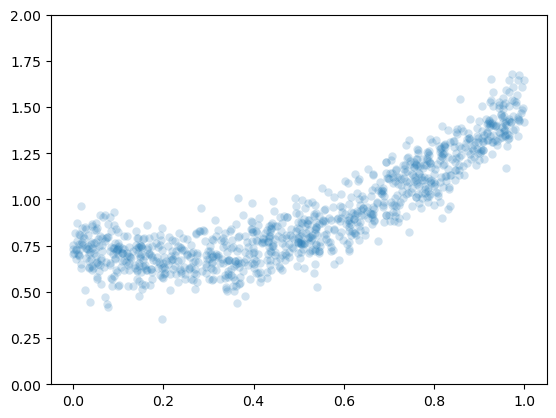

In [2]:
N = 1000
x = np.random.rand(N)
error = 0.1*np.random.randn(N)
y = 0.75 - 0.6*x + 1.4*x**2 + error
plt.scatter(x,y,alpha=0.2,lw=0)
plt.ylim([0,2])
plt.show()

Choose a model of the form: $f(x) = c_0 + c_1x + c_2x^2$.

Recover coefficients using the normal equations.

In [3]:
A = np.column_stack([np.ones(N),x,x**2])
c = la.solve(A.T@A,A.T@y)
c

array([ 0.73929846, -0.57100127,  1.36837008])

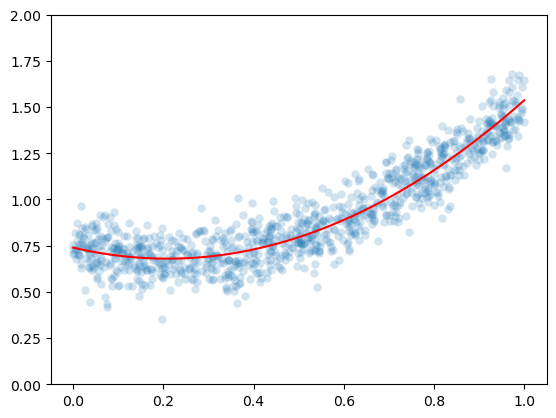

In [4]:
X = np.linspace(0,1,50)
Y = c[0] + c[1]*X + c[2]*X**2
plt.scatter(x,y,alpha=0.2,lw=0)
plt.plot(X,Y,'r')
plt.ylim([0,2])
plt.show()

## Weather Data

In [5]:
data = pd.read_csv('weather.csv')

In [6]:
x = data['dayofyear'].values

In [7]:
y = data['avg_temperature'].values

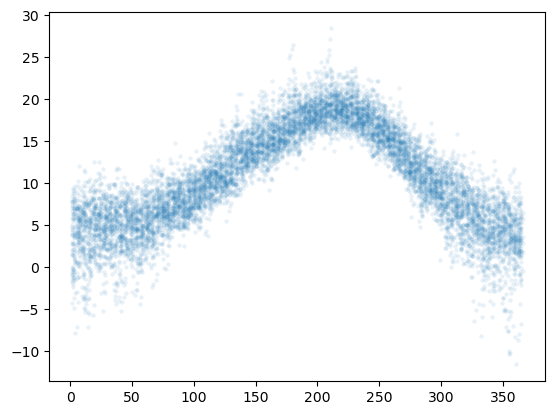

In [8]:
plt.scatter(x,y,alpha=0.1,lw=0,s=10)
plt.show()

Choose a model: $f(x) = c_0 + c_1x + c_2x^2$.

Average squared error = 10.688736644567092


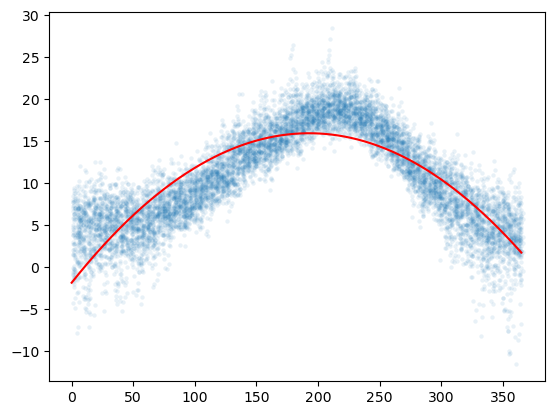

In [11]:
A = np.column_stack([np.ones(len(x)),x,x**2])
c = la.solve(A.T@A,A.T@y)

X = np.linspace(0,365,1000)
Y = c[0] + c[1]*X + c[2]*X**2

SSE = la.norm(y - A@c)**2/len(x)
print("Average squared error =",SSE)

plt.scatter(x,y,alpha=0.1,lw=0,s=10)
plt.plot(X,Y,'r')
plt.show()

Choose a model: $f(x) = c_0 + c_1 \sin(x) + c_2 \cos(x)$.

Average squared error = 34.252422369338966


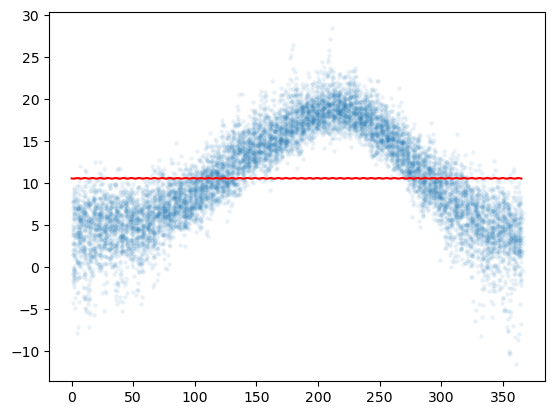

In [12]:
N = len(x)
A = np.column_stack([np.ones(N),np.sin(x),np.cos(x)])
c = la.solve(A.T@A,A.T@y)

X = np.linspace(0,365,1000)
Y = c[0] + c[1]*np.sin(X) + c[2]*np.cos(X)

SSE = la.norm(y - A@c)**2/len(x)
print("Average squared error =",SSE)

plt.scatter(x,y,alpha=0.1,lw=0,s=10)
plt.plot(X,Y,'r')
plt.show()

Choose a model: $f(x) = c_0 + c_1 \sin(w x) + c_2 \cos(w x)$.

Average squared error = 6.599711622707076


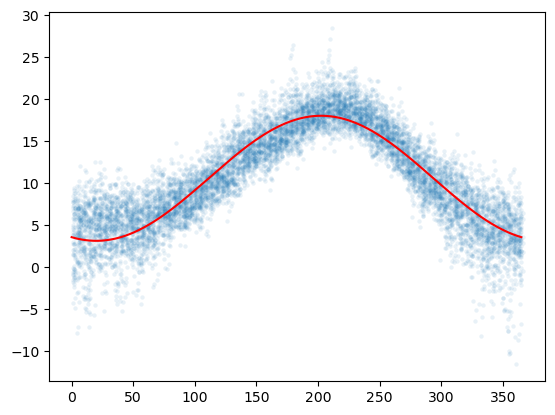

In [13]:
N = len(x)
w = 2*np.pi/365
A = np.column_stack([np.ones(N),np.sin(w*x),np.cos(w*x)])
c = la.solve(A.T@A,A.T@y)

X = np.linspace(0,365,1000)
Y = c[0] + c[1]*np.sin(w*X) + c[2]*np.cos(w*X)

SSE = la.norm(y - A@c)**2/N
print("Average squared error =",SSE)

plt.scatter(x,y,alpha=0.1,lw=0,s=10)
plt.plot(X,Y,'r')
plt.show()

Choose a model: $f(x) = c_0 + c_1 \sin(w_0 x) + c_2 \cos(w_0 x) + c_3 \sin(w_1 x) + c_4 \cos(w_1 x)$ with $w_0 = 2\pi/365$ and $w_1 = ?$.